In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("C:\\Users\\zhy92\\Desktop\\Stevens Master\\Kaggle projects\\US conties covid 19\\us-counties.csv")
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
df=data.drop(['fips'],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30843 entries, 0 to 30842
Data columns (total 5 columns):
date      30843 non-null object
county    30843 non-null object
state     30843 non-null object
cases     30843 non-null int64
deaths    30843 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [68]:
df['state'].describe()

count       30843
unique         55
top       Georgia
freq         1789
Name: state, dtype: object

<font size='9'> Some visualization

In [13]:
df_sample=df[['county','deaths']]
df_county=df_sample.groupby('county',axis=0).count()
df_county.head()

,deaths
county,
Abbeville,16
Acadia,13
Accomack,15
Ada,22
Adair,40


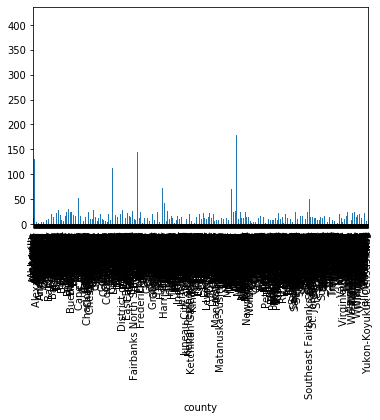

In [14]:
df_county['deaths'].plot(kind='bar')

<font size='9'> Linear and non-linear regression of Cases and Deaths

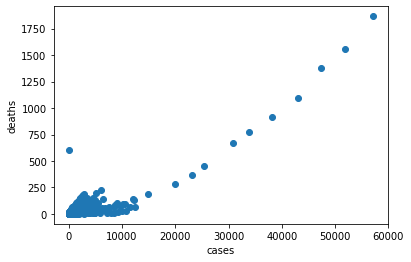

In [4]:
plt.scatter(df.cases,df.deaths)
plt.xlabel('cases')
plt.ylabel('deaths')
plt.show()




In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 

In [14]:
x=df['cases'].values.reshape(-1,1)
y=df['deaths'].values.reshape(-1,1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
linf = LinearRegression()  
linf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(linf.intercept_)
print(linf.coef_)

[-0.30166798]
[[0.02445117]]


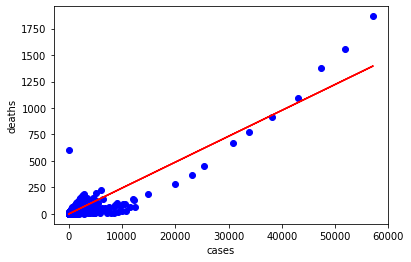

In [17]:
plt.scatter(df.cases,df.deaths,  color='blue')
plt.plot(X_train, linf.coef_[0][0]*X_train + linf.intercept_[0], '-r')
plt.xlabel("cases")
plt.ylabel("deaths")
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [19]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)
train_x_poly

array([[1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 5.900e+01, 3.481e+03],
       ...,
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00]])

In [20]:
clf = linear_model.LinearRegression()
clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[0.00000000e+00 8.48189475e-03 4.14963823e-07]]
Intercept:  [0.39783362]


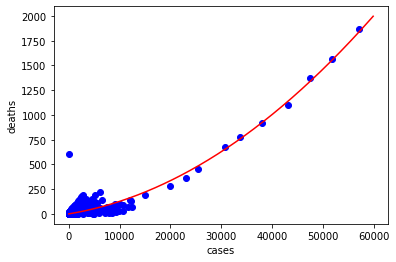

In [48]:
plt.scatter(df.cases,df.deaths,  color='blue')
XX = np.arange(0.0, 60000.0, 100)
plt.plot(XX, clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2) + clf.intercept_[0], '-r')
plt.xlabel("cases")
plt.ylabel("deaths")
plt.show()

<font size='9'> Some graphs regarding states

In [57]:
df2=df[df['state']=='Washington']

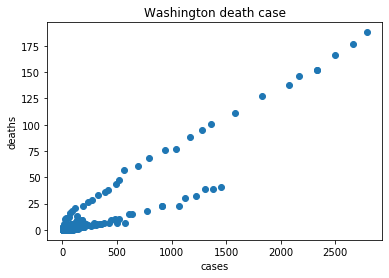

In [58]:
plt.scatter(df2.cases,df2.deaths)
plt.title('Washington death case')
plt.xlabel('cases')
plt.ylabel('deaths')
plt.show()

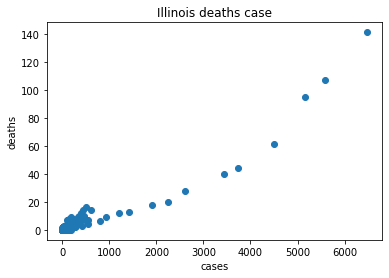

In [59]:
df2=df[df['state']=='Illinois']
plt.scatter(df2.cases,df2.deaths)
plt.title('Illinois deaths case')
plt.xlabel('cases')
plt.ylabel('deaths')
plt.show()

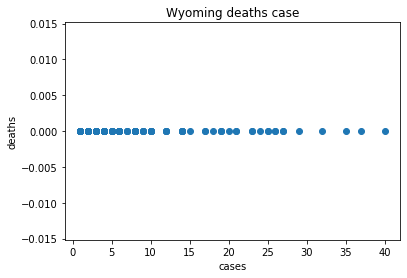

In [60]:
df2=df[df['state']=='Wyoming']
plt.scatter(df2.cases,df2.deaths)
plt.title('Wyoming deaths case')
plt.xlabel('cases')
plt.ylabel('deaths')
plt.show()

In [33]:
df_state=df.groupby('state',axis=0).sum()
df_state.sort_values(['cases'],ascending=False,axis=0,inplace=True)
df_top5=df_state.head()
df_top5

,cases,deaths
state,,
New York,743198,12602
New Jersey,170274,2762
California,89145,1847
Michigan,71954,2198
Washington,63368,3193


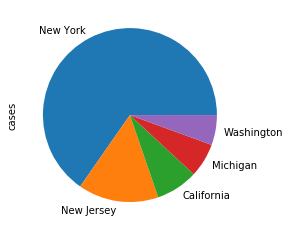

In [34]:
df_top5['cases'].plot(kind='pie')
plt.show()

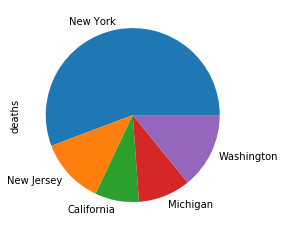

In [35]:
df_top5['deaths'].plot(kind='pie')
plt.show()

<font size='9'> multi Linear Regression
    

In [27]:
df=df.drop(columns='date')
df_catg_col=df.select_dtypes(exclude=np.number).columns
df_catg_col

Index(['county', 'state'], dtype='object')

In [28]:
df_num_col=df.select_dtypes(include=np.number).columns
df_num_col

Index(['cases', 'deaths'], dtype='object')

In [29]:
df_dummy=pd.get_dummies(df[df_catg_col])
df_dummy

,county_Abbeville,county_Acadia,county_Accomack,county_Ada,county_Adair,county_Adams,county_Addison,county_Aiken,county_Alachua,county_Alamance,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df_final=pd.concat([df[df_num_col],df_dummy],axis=1)
df_final

,cases,deaths,county_Abbeville,county_Acadia,county_Accomack,county_Ada,county_Adair,county_Adams,county_Addison,county_Aiken,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30838,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30839,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30840,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30841,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y=df_final['deaths'].values
X=df_final.drop(columns='deaths').values

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=2)
train_y=train_y.reshape(-1,1)
test_y.reshape(-1,1)

lin=LinearRegression().fit(train_x,train_y)
lin

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
pred=lin.predict(test_x)
pred

array([[-0.29435205],
       [-0.20723581],
       [-3.85764074],
       ...,
       [-0.05093336],
       [ 8.80210924],
       [ 5.45526028]])

In [35]:
from sklearn import metrics
test_aberror=metrics.mean_squared_error(test_y,pred)
print(test_aberror)
rmse=np.sqrt(test_aberror)
rmse

114526197649534.92


10701691.34527505